In [1]:
from pandas_datareader import data as pdr

In [2]:
import yfinance as yf

yf.pdr_override()


In [3]:
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()

[*********************100%***********************]  1 of 1 completed


In [4]:
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()



<AxesSubplot:xlabel='Date'>

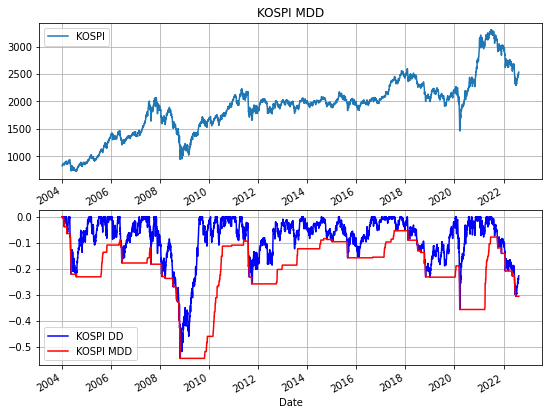

In [5]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)

In [6]:
max_dd.min()

-0.5453665130144085

In [7]:
max_dd[max_dd==max_dd.min()]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


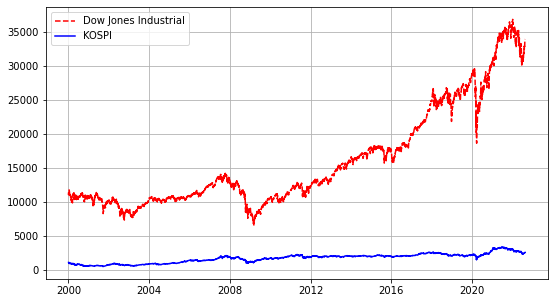

In [9]:
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

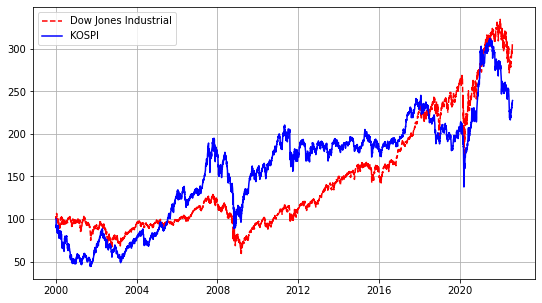

In [10]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [11]:
len(dow); len(kospi)

5579

In [12]:
len(dow)

5691

In [13]:
len(kospi)

5579

ValueError: x and y must be the same size

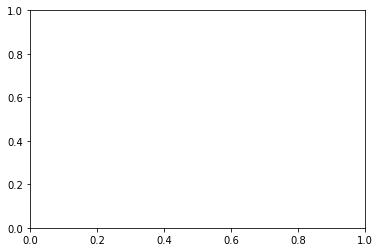

In [14]:
plt.scatter(dow, kospi, marker='.')

In [17]:
df = pd.DataFrame({'DOW':dow.Close, 'KOSPI':kospi.Close})
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2022-08-10,33309.511719,2480.879883
2022-08-11,33336.671875,2523.780029
2022-08-12,33761.050781,2527.939941


In [18]:
import pandas as pd

In [21]:
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2022-08-10,33309.511719,2480.879883
2022-08-11,33336.671875,2523.780029
2022-08-12,33761.050781,2527.939941


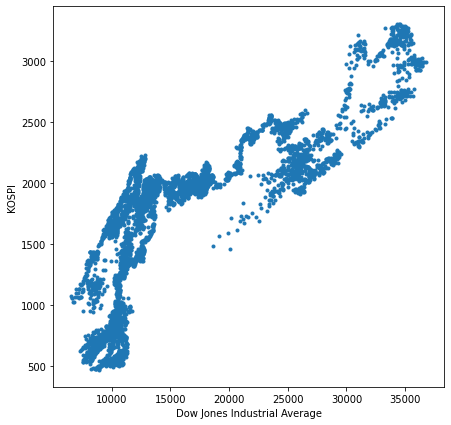

In [22]:
plt.figure(figsize=(7, 7))
plt.scatter(df.DOW, df.KOSPI, marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [23]:
from scipy import stats

regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07391330012949095, intercept=495.88777664152235, rvalue=0.8253359334550193, pvalue=0.0, stderr=0.0006603406669520853, intercept_stderr=11.67478864525639)

In [24]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.825336
KOSPI,0.825336,1.000000


In [26]:
df.DOW.corr(df.KOSPI)

0.8253359334550195

In [27]:
r_squared = df.DOW.corr(df.KOSPI) ** 2

In [28]:
r_squared

0.6811794030520685

/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_51374/3344022922.py:4: UserWarning: Legend does not support 'DOW x KOSPI' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(['DOW x KOSPI'], 'LINE')


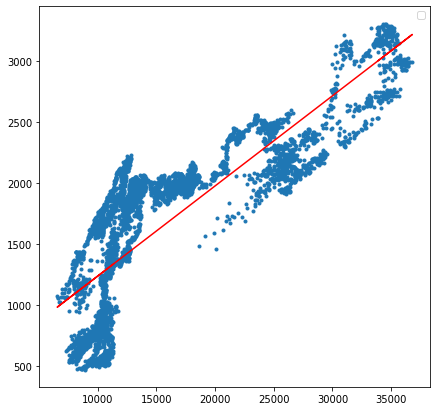

In [29]:
plt.figure(figsize=(7, 7))
plt.plot(df.DOW, df.KOSPI, '.')
plt.plot(df.DOW, regr.slope * df.DOW + regr.intercept, 'r')
plt.legend(['DOW x KOSPI'], 'LINE')

In [30]:
import pandas as pd

s1 = pd.Series([10, -20, 30, -40, 50])
s2 = pd.Series([1, -2, 3, -4, 5])
s3 = pd.Series([-10, 20, -30, 40, -50])
df = pd.DataFrame({'S1' : s1, 'S2' : s2, 'S3' : s3})
df

,S1,S2,S3
0,10,1,-10
1,-20,-2,20
2,30,3,-30
3,-40,-4,40
4,50,5,-50


In [31]:
df.corr()

,S1,S2,S3
S1,1.0,1.0,-1.0
S2,1.0,1.0,-1.0
S3,-1.0,-1.0,1.0
